# 1 Collect Comments from Football Subreddit

In [1]:
import pandas as pd
import requests # Pushshift accesses Reddit via an url so this is needed
import json 
import csv 
import time
import datetime
from requests.exceptions import HTTPError

In [2]:
## builds PushShift URLs for comments
def getPushshiftData(query, after, before, sub):
  # size — increase limit of returned entries to 1000
    url = 'https://api.pushshift.io/reddit/search/comment/?size=1000&after='+str(after)+'&before='+str(before)+'&subreddit='+str(sub)
    print(url)
    r = requests.get(url, headers = {'User-agent': 'your bot 0.1'})
    time.sleep(3)
    r.raise_for_status()  # raises exception when not a 2xx response
    if r.status_code != 204:
        data = json.loads(r.text)
    return data["data"]

In [3]:
## extract key data points
# This function will be used to extract the key data points from each JSON result
def collectSubData(comm):
    # comData was created at the start to hold all the data which is then added to our global subStats dictionary.
    comData = list() #list to store data points
    try:
        # returns the body of the posts
        body = comm["body"]
    except KeyError:
        body = ''
    author = comm["author"]
    aut_id = comm["id"]
    created = datetime.datetime.fromtimestamp(comm["created_utc"]) 
    comData.append((aut_id, body, author, created))
    comStats[aut_id] = comData

In [14]:
## Update the searching settings here
## Here we need to convert time to GMT or UTC form (depends on time zone)
## https://www.epochconverter.com/?prefs
# Premier league
# after = "1599696000"  #23/05/2021
# before = "1622332800" #12/09/2020
# after = "1565308800"  #09/08/2019
# before = "1595721600" #26/07/2020
# after = "1533859200"  #10/08/2018
# before = "1557619200" #12/05/2019
# after = "1502409600"  #11/08/2017
# before = "1526169600" #13/05/2018

# Bundesliga
# after = "1600387200"  #18/09/2020
# before = "1621641600" #22/05/2021
# after = "1565913600"  #16/08/2019
# before = "1593216000" #27/06/2020
# after = "1535068800"  #16/08/2019
# before = "1558137600" #27/06/2020

# after = "1597968000"  #21/08/2020
# before = "1621728000" #23/05/2021
# after = "1565308800"  #09/08/2019
# before = "1596326400" #02/08/2020
# after = "1533859200"  #10/08/2018
# before = "1558828800" #26/05/2019
# after = "1501804800"  #04/08/2017
# before = "1526774400" #20/05/2018
# after = "1470960000"  #12/08/2016
# before = "1497916800" #20/05/2017
# after = "1438905600"  #07/08/2015
# before = "1463184000" #14/05/2016
# after = "1407456000"  #08/08/2014
# before = "1432339200" #23/05/2015
# after = "1376006400"  #09/08/2013
# before = "1400284800" #17/05/2014
# after = "1344556800"  #10/08/2012
# before = "1369526400" #26/05/2013
# after = "1312588800"  #06/08/2011
# before = "1337472000" #20/05/2012
# after = "1281139200"  #10/08/2010
# before = "1306627200" #26/05/2011
# after = "1249689600"  #08/08/2009
# before = "1273881600" #15/05/2010

after = "1218240000"  #09/08/2008
before = "1243641600" #30/05/2009

query = "" # Keyword(s) to look for in submissions
sub = "football" # Subreddit to query

# comCount tracks the number of total comments we collect
comCount = 0
# comStats is the dictionary where we will store our data.
comStats = {}

In [15]:
# We need to run this function outside the loop first to get the updated after variable
data = getPushshiftData(query, after, before, sub)
# Will run until all posts have been gathered i.e. When the length of data variable = 0
# from the 'after' date up until before date
while len(data) > 0: #The length of data is the number submissions (data[0], data[1] etc), once it hits zero (after and before vars are the same) end
    for comment in data:
        # print(comment)
        collectSubData(comment)
        comCount+=1
    # Calls getPushshiftData() with the created date of the last submission
    print(len(data))
    print(str(datetime.datetime.fromtimestamp(data[-1]['created_utc'])))
    # update after variable to last created date of submission
    after = data[-1]['created_utc']
    # data has changed due to the new after variable provided by above code
    data = getPushshiftData(query, after, before, sub)
    
print(len(data))

https://api.pushshift.io/reddit/search/comment/?size=1000&after=1218240000&before=1243641600&subreddit=football
0


In [10]:
# Check if the extraction was successful
print(str(len(comStats)) + " comments have added to list")
print("1st entry is:")
print(list(comStats.values())[0][0][1] + " created: " + str(list(comStats.values())[0][0][3]))
# print(list(comStats.values())[0][0][1])

print("Last entry is:")
print(list(comStats.values())[-1][0][1] + " created: " + str(list(comStats.values())[-1][0][3]))
# print(list(comStats.values())[-1][0][1])|

70 comments have added to list
1st entry is:
Call or email for details.

Feedback is encouraged and appreciated. created: 2011-01-03 21:57:31
Last entry is:
He doesn’t drop them often which is amazing considering how much coverage he gets and how many receptions he has each season.  created: 2011-05-25 02:17:05


In [11]:
## Save data to CSV file
def updateComs_file():
    upload_count = 0
    location = ""
    print("input filename of comment file, please add .csv")
    filename = input()
    file = location + filename
    with open(file, 'w', newline='', encoding='utf-8') as file: 
        a = csv.writer(file, delimiter=',')
        headers = ["ComID","Comment","Author","PublishDate"]
        a.writerow(headers)
        for com in comStats:
            a.writerow(comStats[com][0])
            upload_count+=1
            
        print(str(upload_count) + " Comments have been uploaded")
updateComs_file()

input filename of comment file, please add .csv
comments10-11.csv
70 Comments have been uploaded


<h3>Exploratory Data Analysis<h4>

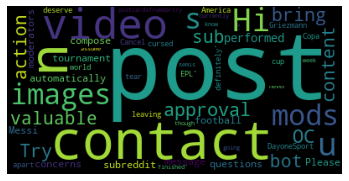

In [29]:
from wordcloud import WordCloud
import numpy as np
import matplotlib.pyplot as plt
df_vis = pd.read_csv('bundesliga20-21.csv')

text = df_vis['Comment'].values 
wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("vis_wordcloudbund2021.png")
plt.show()